In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Fall 2023/AI/PriceDataSet.csv")
print(df)

    weight  price
0        1     10
1        2     20
2        3     25
3        4     40
4        5     45
5        6     75
6        7     90
7        8    100
8        9    115
9       10    120
10      11    130
11      12    132
12      13    140
13      14    160
14      15    165


In [6]:
df.isnull().sum()

weight    0
price     0
dtype: int64

In [7]:
x = df[["weight"]].values
y = df["price"]

In [14]:
x[0:10]

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

Text(0.5, 1.0, 'Price prediction')

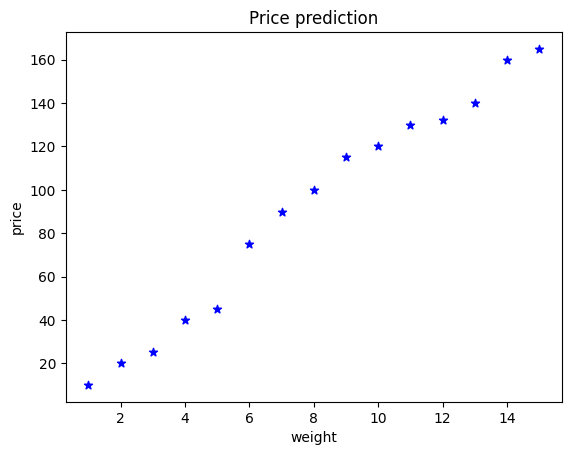

In [36]:
plt.scatter(x,y, marker = "*", color="blue")
plt.xlabel("weight")
plt.ylabel("price")
plt.title("Price prediction")

In [19]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size = 0.25,random_state= 1 )

In [33]:
x_test
y_test

3     40
7    100
6     90
2     25
Name: price, dtype: int64

In [34]:
X_train

array([[11],
       [ 5],
       [ 2],
       [14],
       [ 1],
       [15],
       [10],
       [ 9],
       [13],
       [12],
       [ 6]])

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
new = LinearRegression()

In [40]:
new.fit(x_train, y_train)

LinearRegression()

In [41]:
new.predict(x_test)

array([45.28752979, 90.75694996, 79.38959492, 33.92017474])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


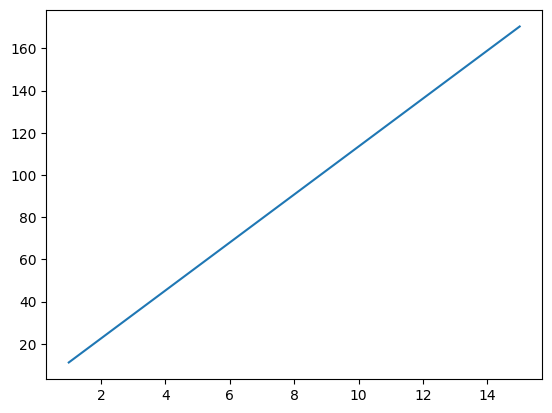

In [42]:
plt.plot(df["weight"], new.predict(df[["weight"]]))

In [43]:
new.predict([[3]])

array([33.92017474])

In [44]:
new.score(x_test,y_test)

0.924905153000603

In [45]:
df = pd.read_csv("/content/drive/MyDrive/Fall 2023/AI/carprices.csv")
print(df)

         Car Model  Mileage  Sell Price  Age
0           BMW X5    69000       18000    6
1           BMW X5    35000       34000    3
2           BMW X5    57000       26100    5
3           BMW X5    22500       40000    2
4           BMW X5    46000       31500    4
5             Audi    59000       29400    5
6             Audi    52000       32000    5
7             Audi    72000       19300    6
8             Audi    91000       12000    8
9   Mercedez Benz     67000       22000    6
10  Mercedez Benz     83000       20000    7
11  Mercedez Benz     79000       21000    7
12  Mercedez Benz     59000       33000    5
13          Toyota    51000       42000    4
14          Toyota    65000       32000    7
15          Toyota    39000       55000    5


In [48]:
dummies=pd.get_dummies(df['Car Model'])
print(dummies)

    Audi  BMW X5  Mercedez Benz   Toyota
0      0       1               0       0
1      0       1               0       0
2      0       1               0       0
3      0       1               0       0
4      0       1               0       0
5      1       0               0       0
6      1       0               0       0
7      1       0               0       0
8      1       0               0       0
9      0       0               1       0
10     0       0               1       0
11     0       0               1       0
12     0       0               1       0
13     0       0               0       1
14     0       0               0       1
15     0       0               0       1


In [49]:
merged=pd.concat([df,dummies],axis='columns')
print(merged)

         Car Model  Mileage  Sell Price  Age  Audi  BMW X5  Mercedez Benz   \
0           BMW X5    69000       18000    6     0       1               0   
1           BMW X5    35000       34000    3     0       1               0   
2           BMW X5    57000       26100    5     0       1               0   
3           BMW X5    22500       40000    2     0       1               0   
4           BMW X5    46000       31500    4     0       1               0   
5             Audi    59000       29400    5     1       0               0   
6             Audi    52000       32000    5     1       0               0   
7             Audi    72000       19300    6     1       0               0   
8             Audi    91000       12000    8     1       0               0   
9   Mercedez Benz     67000       22000    6     0       0               1   
10  Mercedez Benz     83000       20000    7     0       0               1   
11  Mercedez Benz     79000       21000    7     0       0      

In [55]:
final=merged.drop(['Car Model'],axis='columns')
print(final)
y= final['Sell Price']
print(y)

    Mileage  Sell Price  Age  Audi  BMW X5  Mercedez Benz   Toyota
0     69000       18000    6     0       1               0       0
1     35000       34000    3     0       1               0       0
2     57000       26100    5     0       1               0       0
3     22500       40000    2     0       1               0       0
4     46000       31500    4     0       1               0       0
5     59000       29400    5     1       0               0       0
6     52000       32000    5     1       0               0       0
7     72000       19300    6     1       0               0       0
8     91000       12000    8     1       0               0       0
9     67000       22000    6     0       0               1       0
10    83000       20000    7     0       0               1       0
11    79000       21000    7     0       0               1       0
12    59000       33000    5     0       0               1       0
13    51000       42000    4     0       0               0    

In [56]:
X= final[['Mileage', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ','Toyota']]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)